# Probability Distributions

In this notebook we will introduce some useful probability distributions that every data scientist should know. In simple words, a probability distribution describes the distribution of probabilities across the set of possible outcomes of a random variable. A random variable, in turn, is a variable whose values are the outcome of a random phenomenon.

In general, we differentiate between two kinds of probability distributions:
* Discrete probability distributions relate to random variables whose possible outcomes are finite. For example, if we role a regular dice, it can only take the values $\{1, 2, 3, 4, 5, 6\}$.
* Continuous probability distributions, on the other hand, relate to random variables that take values from a continuum. For example, if we rotate a magnetless pointer it can take any real number in the intervall $[0, 360)$.

Let's start with some fundamental distributions.

In [476]:
# Import packages and define helper functions
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns
import numpy as np

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,10)})

def hist_kde_plot(sample, hist_kwargs={}, kde_kwargs={}, ax=None):
    ax = sns.histplot(sample, stat="density", ax=ax, **hist_kwargs)
    if hist_kwargs.get('discrete') == True:
        return ax
    sns.kdeplot(sample, ax=ax, **kde_kwargs)
    return ax

## Discrete Uniform Distribution

The **discrete uniform distribution** is a discrete distribution with $n$ possible outcomes that occur with equal probability $\frac{1}{n}$. 

The traditional example for illustrating this distribution is a dice roll. The roll of a fair dice is a random variable with six possible outcomes $\{1, 2, 3, 4, 5, 6\}$. All outcomes occur with the same probability $p = \frac{1}{6}$. 

Note: In scikit-learn all possible outcomes must lie in the half-open range `[low, high)`.

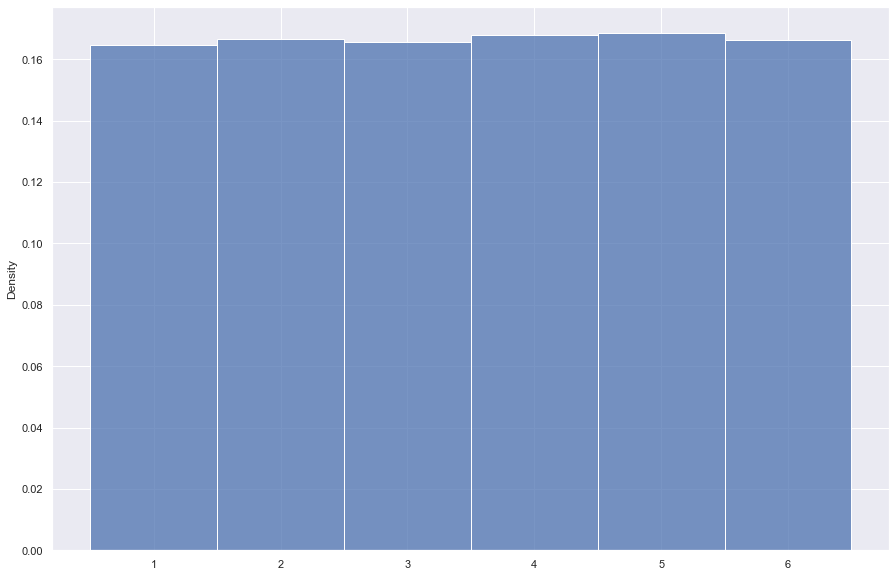

In [429]:
from scipy.stats import randint
disc_uniform_sample = randint.rvs(low = 1, high = 7, size = 100_000, random_state = 0)
hist_kde_plot(
    disc_uniform_sample, 
    hist_kwargs={'discrete': True}, 
    kde_kwargs={'linewidth': 3, 'color': 'orange'}
)
plt.show()

# Continuous Uniform Distribution 
The **continuous uniform distribution $U(A, B)$** is a continouos distribution that describes an experiment where there is an arbitrary  outcome that lies between certain bounds $A$ (lower bound) and $B$ (upper bound). All intervals of fix length that lie between these bounds are equally probable. 

Note: In scikit-learn the `loc` parameter equals $A$ and the `scale` parameter equals $B-A$.

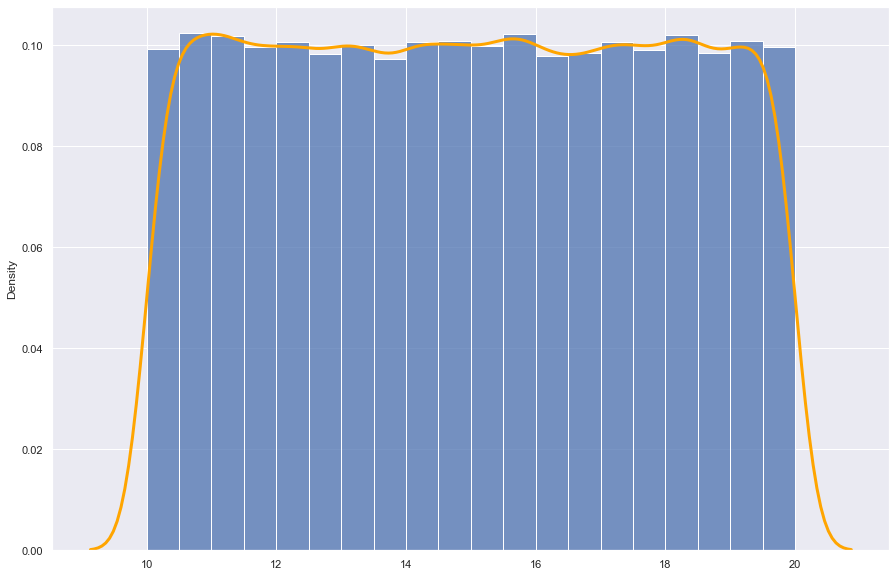

In [412]:
from scipy.stats import uniform
cont_uniform_sample = uniform.rvs(loc = 10, scale = 10, size = 100_000, random_state = 0)
hist_kde_plot(
    cont_uniform_sample, 
    hist_kwargs={'bins': 20}, 
    kde_kwargs={'linewidth': 3, 'color': 'orange'}
)
plt.show()

A special case of the continuous uniform distribution is the **standard uniform distribution $U(0, 1)$** which describes the experiment of drawing a random number between 0 and 1. We can transform any uniform distribution into a standard uniform distribution using the following transformation for the random variable $X$:

$$X' = \frac{X - A}{B - A}$$

We prove this relationship in the following:

In [419]:
np.testing.assert_allclose( 
    (cont_uniform_sample - 10) / 10,
    uniform.rvs(size = 100_000, random_state = 0)
)

# Normal Distribution

The **normal distribution $N(\mu, \sigma)$**  is a continuous distribution that fits many natural phenomena. Also it stands at the core of the **central limit theorem** which is one of the most important concepts in probability theory. 

A normal distribution has two parameters. $\mu$ gives the mean and $\sigma$ the standard deviation of the distribution. Due to its appearance, the normal distribution is also called **bell curve**. That is, most of its data values tend to cluster around the mean, and the further away a value is from the mean $\mu$, the less likely it is to occur. The likelihood of a value with fixed distance from the mean depends on the standard deviation $\sigma$ of the distribution.

Note: In scikit-learn the `loc` parameter equals $\mu$ and the `scale` parameter equals $\sigma$.

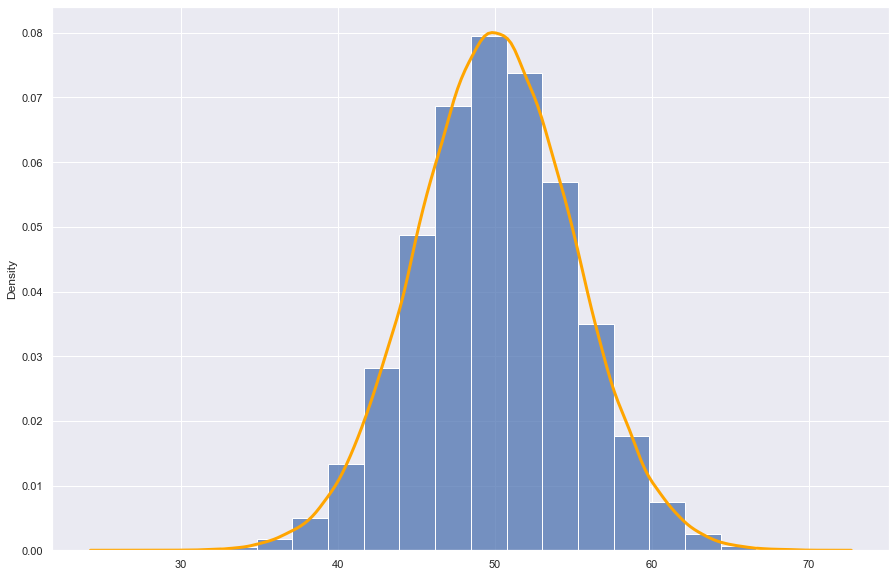

In [416]:
from scipy.stats import norm
normal_sample = norm.rvs(loc = 50, scale = 5, size = 100_000, random_state = 0)
hist_kde_plot(
    normal_sample, 
    hist_kwargs={'bins': 20}, 
    kde_kwargs={'linewidth': 3, 'color': 'orange'}
)
plt.show()

A special case of the normal distribution is the **standard normal distribution $N(0, 1)$** which describes a normal distribution with a mean of 0 and a standard deviation of 1. We can transform any normal distribution into a  standard normal distribution using the following transformation for the random variable $X$:

$$X' = \frac{X - \mu}{\sigma}$$

We prove this relationship in the following:

In [418]:
np.testing.assert_allclose( 
    (normal_sample - 50) / 5,
    norm.rvs(size = 100_000, random_state = 0)
)

# Poisson Distribution

The **poisson distribution** $Pois(\lambda)$ is a discrete distribution that models the number of events during a fixed interval of time or space if these events occur with a known constant mean rate $\lambda$ and independently of the time since the last event. Therefore the poisson distribution may be useful for modeling the number of arriving customers in a store between 10 and 11 am or the number of production faults on a large sheet of metal.


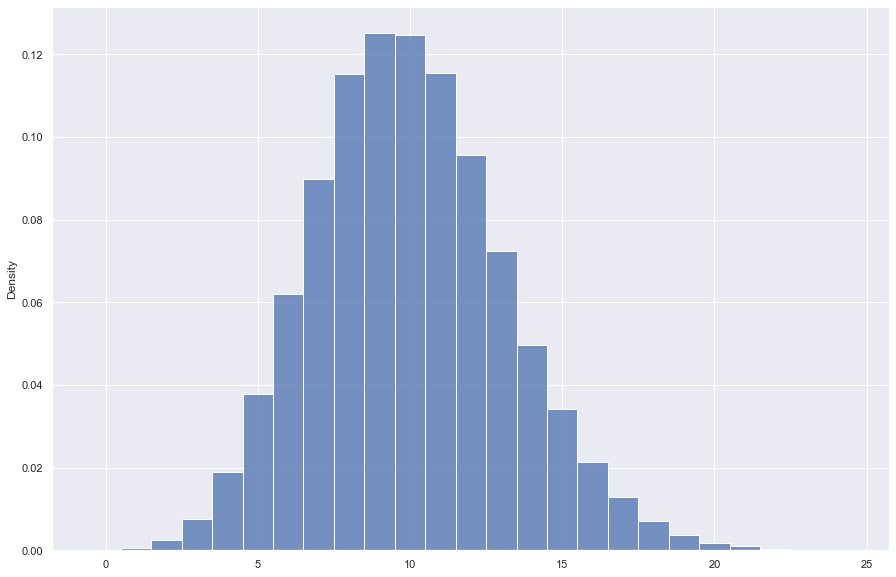

In [298]:
from scipy.stats import poisson
poisson_sample = poisson.rvs(mu = 10, size = 100_000)
hist_kde_plot(
    poisson_sample, 
    hist_kwargs={'bins': 20, 'discrete': True}, 
    kde_kwargs={}
)
plt.show()

# Exponential Distribution

The **exponential distribution** $Exp(\lambda)$ is a continuous distribution for modeling the time (or space) between two events of a poisson process. The parameter $\lambda$ describes the mean rate of the underlying poisson process, that is, the average number of events in a unit interval.

Note: In scikit-learn the `scale` parameter corresponds to $\frac{1}{\lambda}$.

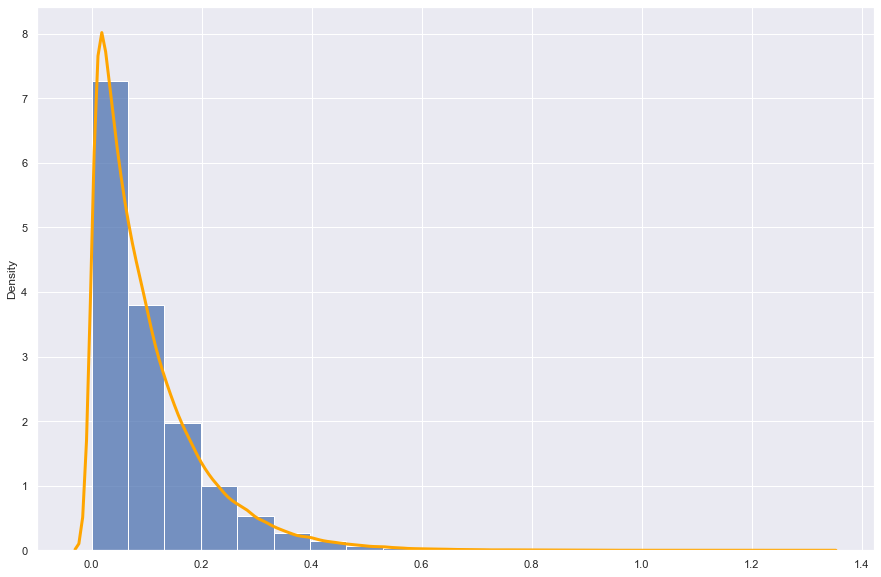

In [442]:
from scipy.stats import expon
expon_sample = expon.rvs(scale = 0.1, size = 100_000)
hist_kde_plot(
    expon_sample, 
    hist_kwargs={'bins': 20}, 
    kde_kwargs={'linewidth': 3, 'color': 'orange'}
)
plt.show()

One important characteristic of the exponential distribution is that it is memory-less. Meaning that the probability of an event in the next `d` time units is independent of the elapsed time `s` since the last event:

$P(X \leq s+d| X > s)$ = $P(X \leq d)$

In [453]:
# Setup example
dist = expon(scale = 0.1)
s = 0.2
d = 0.1

# Calculate probabilities
print("Probability of event happening in the next 0.1 seconds at point t = 0")
print(f"{dist.cdf(d):.2%}\n")
print("Probability of event happing in the next 0.1 seconds at point t = s")
print(f"{(dist.cdf(s+d)-dist.cdf(s))/(1-dist.cdf(s)):.2%}")

Probability of event happening in the next 0.1 seconds at point t = 0
63.21%

Probability of event happing in the next 0.1 seconds at point t = s
63.21%


# Gamma Distribution

The **gamma distribution** $Gamma(k, \theta)$ is generalization of the **exponential distribution**. While the exponential distribution models the wait time until the *first event*, the gamma distribution predicts the wait time until the *k-th event*. However, both distributions describe a poisson process with a constant mean rate of $\lambda$ or $\theta$.

Note: In scikit-learn the `scale` parameter corresponds to $\frac{1}{\theta}$.

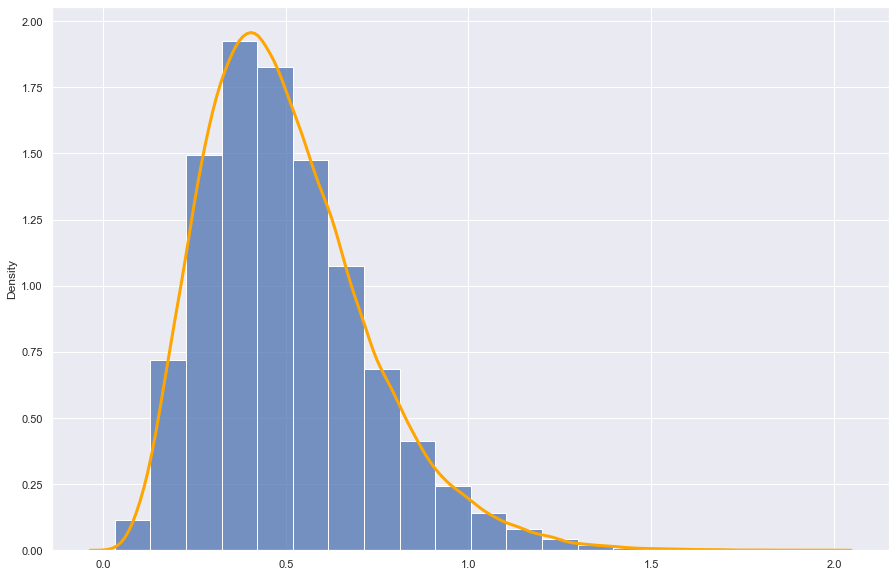

In [456]:
from scipy.stats import gamma
gamma_sample = gamma.rvs(a = 5, scale = 0.1, size = 100_000)
hist_kde_plot(
    gamma_sample, 
    hist_kwargs={'bins': 20}, 
    kde_kwargs={'linewidth': 3, 'color': 'orange'}
)
plt.show()

We can show that the exponential distribution is a special case of the gamma distribution with $k = 1$:

In [457]:
np.testing.assert_allclose( 
    expon.rvs(size = 100_000, random_state = 0),
    gamma.rvs(a=1, size = 100_000, random_state = 0)
)

# Weibull Distribution

The **weibull distribution** $Weib(k, \lambda)$ is another continuous distribution with a close connection to the **exponential distribution**. With both distributions we can model the time between two events. For this purpose, the exponential distribution assumes a constant event rate $\lambda$ making the distribution "memory-less". With the weibull distribution, however, we can model increasing ($k>1$) and decreasing ($k<1$) event rates.

Note: In scikit-learn the `c` parameter corresponds to $k$ and `scale` to $\frac{1}{\lambda}$.

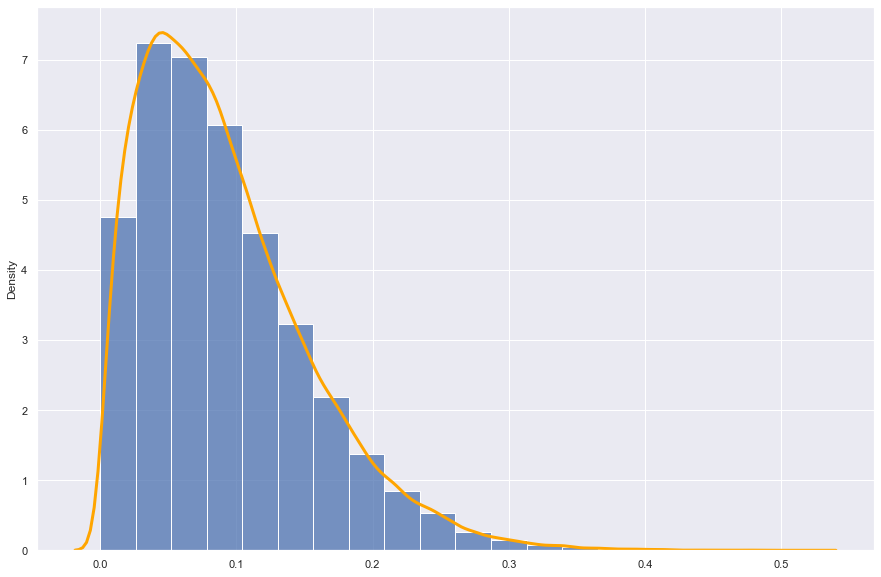

In [469]:
from scipy.stats import weibull_min
weibull_sample = weibull_min.rvs(c=1.5, scale=0.1, size = 100_000)
hist_kde_plot(
    weibull_sample, 
    hist_kwargs={'bins': 20}, 
    kde_kwargs={'linewidth': 3, 'color': 'orange'}
)
plt.show()

We can show that the exponential distribution is a special case of the weibull distribution with $k = 1$:

In [470]:
np.testing.assert_allclose( 
    expon.rvs(scale = 0.1, size = 100_000, random_state = 0),
    weibull_min.rvs(c = 1, scale = 0.1, size = 100_000, random_state = 0)
)

# Binomial Distribution

The **binomial distribution** $B(n, p)$ is a discrete distribution for modeling the number of successes in a sequence of $n$ independent experiments with success probability $p$. 

The traditional example for illustrating this distribution is flipping a coin $n$ times. We can use a binomial distribution with parameters $n$ and $p = 0.5$ (assuming that the coin is fair) for modeling the probability that we encounter a specific number of heads or tails.

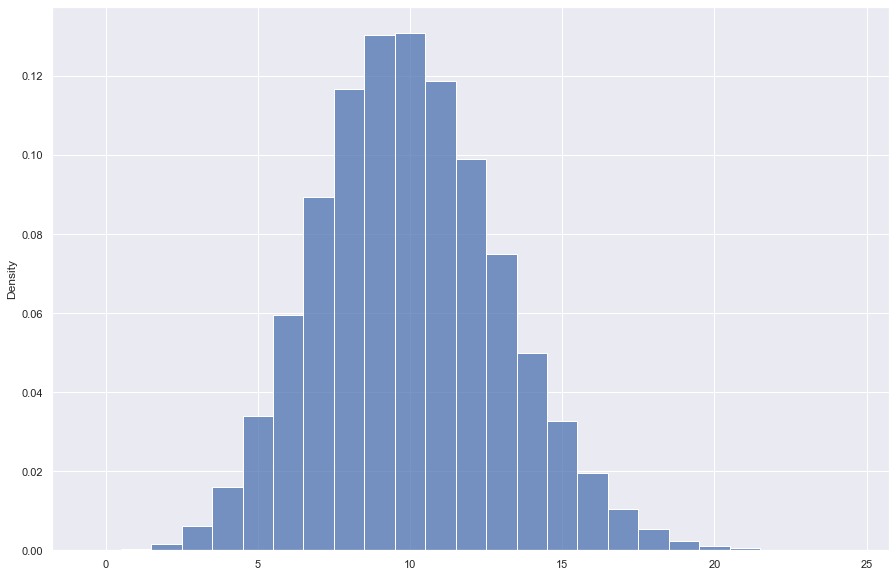

In [475]:
from scipy.stats import binom
binom_sample = binom.rvs(n=100, p=0.1, size = 100_000)
hist_kde_plot(
    binom_sample, 
    hist_kwargs={'bins': 20, 'discrete': True}, 
    kde_kwargs={}
)
plt.show()

# Bernoulli Distribution

The **bernoulli distribution** $BE(p)$ is a special case of the **binomial distribution**. It describes a single experiment with success probability $p$ and therefore corresponds to a binomial distribution with $n=1$. Or to put it in another way, the binomial distribution describes a sequence of $n$ independent bernoulli experiments.

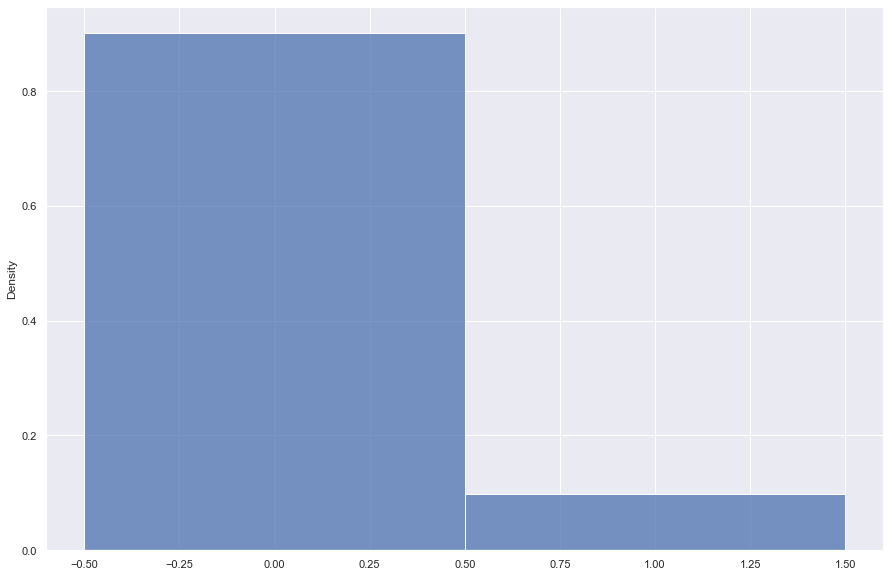

In [377]:
from scipy.stats import bernoulli
bernoulli_sample = bernoulli.rvs(p=0.1, size = 100_000)
hist_kde_plot(
    bernoulli_sample, 
    hist_kwargs={'bins': 20, 'discrete': True}, 
    kde_kwargs={}
)
plt.show()